In [14]:
# импортируем программные библиотеки, которые помогут нам работать со спутниковыми данными

# Основное средство - GDAL. Основной компонент работы с растровыми геоданными, который вообще везде
from osgeo import gdal

# matplotlib - самая большая и мощная библиотека визуализации данных в Python
import matplotlib.pyplot as plt
import matplotlib as mpl

# numpy - одна из главных математических библиотек Python. Быстрые вычисления матриц (а снимки - это матрицы)
import numpy as np

# Некоторые служебные команды. Так мы сможем смотреть на изображения прямо в jupyter notebook
from IPython.display import Image

# Настроим размер картинок, которые будет показывать jupyter notebook
mpl.rcParams['figure.figsize'] = (10,10)

In [15]:
#подгрузка вероятностей, землепользования на 1770 и пустого файла для лэнд юза
dataset = gdal.Open('Probability/lu1860.asc')
dataset0 = gdal.Open('Probability/P0.asc')
dataset1 = gdal.Open('Probability/P1.asc')
dataset2 = gdal.Open('Probability/P2.asc')
dataset3 = gdal.Open('Probability/P3.asc')
dataset4 = gdal.Open('Probability/Empty.asc')

In [16]:
#determining raster size
X=dataset0.RasterXSize
Y=dataset0.RasterYSize

In [17]:
# Матрица чисел
dataset.ReadAsArray()

array([[-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       ...,
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.],
       [-99999., -99999., -99999., ..., -99999., -99999., -99999.]],
      dtype=float32)

In [18]:
LU1860=dataset.ReadAsArray()

In [19]:
#открытие растров
P0=dataset0.ReadAsArray()
P1=dataset1.ReadAsArray()
P2=dataset2.ReadAsArray()
P3=dataset3.ReadAsArray()
LU=dataset4.ReadAsArray()
#ввод E0, E1, E2, E3
iter0=0
iter1=0
iter2=0
iter3=0
count=0
#ввод эластичностей
E0=0.2177815772600983
E1=0.43029512473503995
E2=0.24595155709342562
E3=3.6788990825688074
#добавление эластичностей в пикселях с опр. LU (поощряет сохранение в старых границах)
for i in range(0, Y):
    for j in range(0, X):
        if P0[i][j]!=-99999:
            if LU[i][j]==0:
                P0[i][j]+=E0
            if LU[i][j]==1:
                P1[i][j]+=E1
            if LU[i][j]==2:
                P2[i][j]+=E2
            if LU[i][j]==3:
                P3[i][j]+=E3
            else:
                continue
#несколько итераций
#ввод maxcount
maxcount=20000
while count<maxcount:
    #добавление итерационного параметра
    for i in range(0, Y):
        for j in range(0, X):
            if P0[i][j]!=-99999:
                P0[i][j]+=iter0
                P1[i][j]+=iter1
                P2[i][j]+=iter2
                P3[i][j]+=iter3
            else:
                continue
        #первичное распределение лэнд юза
    for i in range(0, Y):
            for j in range(0, X):
                if P0[i][j]!=-99999:
                    PG=max(P0[i][j],P1[i][j],P2[i][j],P3[i][j])
                    if P1[i][j]>=PG:
                        LU[i][j]=1
                    else:
                        LU[i][j]=4
                else:
                    LU[i][j]=-99999
                if LU1860[i][j]==5:
                        LU[i][j]=5
                else:
                    continue
    #подсчёт доли пикселей от общего LU
    uses=0
    fields=0
    for i in range(0, Y):
        for j in range(0, X):
            if P0[i][j]!=-99999:
                uses+=1
                if LU[i][j]==1:
                    fields+=1
    print ('Fields =', fields)
    demand1=0.07630802789640234
    diff1=demand1-fields/uses
    #выведем разницы
    print ('diff1 =', diff1)
    check1=0
    if diff1>0.01 or diff1<-0.01: #число из головы (1%)
        iter1=diff1
    else:
        check1=1
    #находим подходящее распределение
    if check1==1:
        print ('success')
        break
    else:
        print ('one more')

Fields = 3958
diff1 = 0.04590770837813757
one more
Fields = 4902
diff1 = 0.03865710160066361
one more
Fields = 5714
diff1 = 0.03242035085563304
one more
Fields = 6378
diff1 = 0.027320347783342032
one more
Fields = 7056
diff1 = 0.022112814525791877
one more
Fields = 7601
diff1 = 0.017926818028203624
one more
Fields = 8038
diff1 = 0.014570340102614515
one more
Fields = 8388
diff1 = 0.011882085471135825
one more
Fields = 8666
diff1 = 0.009746843220989884
success


In [23]:
#импорт созданного грида (без привязки!)
#координаты добавлены вручную
np.savetxt('C:/Users/olegz/Desktop/CLUE/White Lake project/Predicted/Predicted16.asc', LU, fmt='%4.1f', comments='', header='NCOLS %s \nNROWS %s \nXLLCORNER 569875.0000000000 \nYLLCORNER 6120445.0000000000 \nCELLSIZE 30.000000 \nNODATA_VALUE -99999.0'%(X, Y))

In [21]:
#подготовка к быстрой визуализации в Питоне
#убираем nodata
LU[LU == -99999.] = np.nan

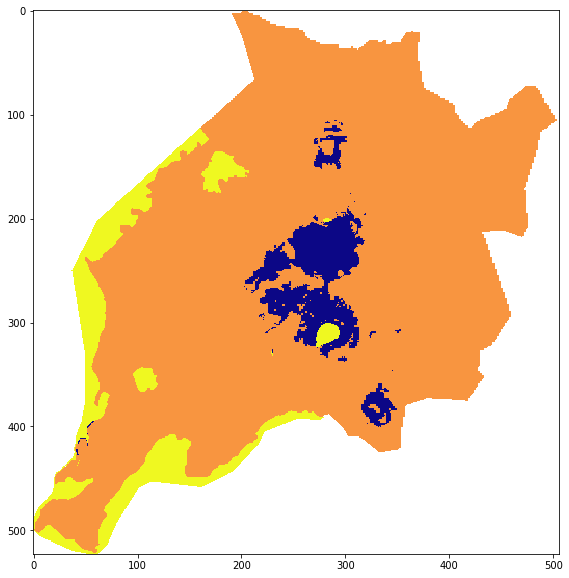

In [22]:
mpl.rcParams['figure.figsize'] = (10, 10)
plt.imshow(LU, cmap='plasma')
plt.show()